# 스타벅스 분석

**사용 라이브러리**
>   - requests

### 스타벅스 개점한 요일에 대한 정보 찾기

1. 스타벅스 각 지점에 대한 정보 받아오기
2. 오픈한 날짜 정보가 있는 지 탐색
>    - 있을 경우 3번으로 진행
>    - 없을 경우 1번부터 진행
3. 오픈한 날짜에 대해서 날짜 관련 객체로 반환
4. 객체를 순차적으로 탐색하며 집계 차트 완성 

In [2]:
import requests

#정보를 받아올 url 주소
url = "https://www.starbucks.co.kr/store/getStore.do?r=EXRPGE2OU7"

# POST 통신에 필요한 데이터 전송
payload = {"in_biz_cds" : "0","in_scodes" : "0","ins_lat" : "37.4947","ins_lng" : "127.0493","search_text" : "","p_sido_cd" : "01","p_gugun_cd" : "","isError" : "true","in_distance" : "0","in_biz_cd" : "","iend" : "1000","searchType" : "C","set_date" : "","rndCod" : "N92GB828NC","all_store" : "0","T03" : "0","T01" : "0","T27" : "0","T12" : "0","T09" : "0","T30" : "0","T05" : "0","T22" : "0","T21" : "0","T10" : "0","T36" : "0","T43" : "0","T48" : "0","Z9999" : "0","P02" : "0","P10" : "0","P50" : "0","P20" : "0","P60" : "0","P30" : "0","P70" : "0","P40" : "0","P80" : "0","whcroad_yn" : "0","P90" : "0","P01" : "0","new_bool" : "0",}
r = requests.post(url, data=payload)

In [15]:
display(r.json().keys())
display(r.json()['list'][0].keys())
display(r.json()['list'][0]['open_dt'])


dict_keys(['list'])

dict_keys(['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order', 'view_yn', 'store_num', 'sido', 'gugun', 'address', 'new_img_nm', 'p_pro_seq', 'p_view_yn', 'p_sido_cd', 'p_gugun_cd', 'p_store_nm', 'p_theme_cd', 'p_wireless_yn', 'p_smoking_yn', 'p_book_yn', 'p_music_yn', 'p_terrace_yn', 'p_table_yn', 'p_takeout_yn', 'p_parking_yn', 'p_dollar_assent', 'p_card_recharge', 'p_subway_yn', 'stb_store_file_renew', 'stb_store_theme_renew', 'stb_store_time_renew', 'stb_store_lsm', 's_code', 's_name', 'tel', 'fax', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name', 'addr', 'park_info', 'new_state', 'theme_state', 'new_bool', 'search_text', 'ins_lat', 'ins_lng', 'in_distance', 'out_distance', 'all_search_cnt', 'addr_search_cnt', 'store_search_cnt', 'rowCount', 'store_nm', 'store_cd', 's_biz_code', 'new_icon', 'set_user', 'favorites', 'map_desc', 'notice', 'defaultimage', 'etcimage', 'in_biz_cd', 'in_store_cd', 'in_favorites', 'in_user_id', 'in_biz_cds', 'in_biz_arr', 'in_biz_arrda

'20190613'

In [25]:
from datetime import datetime, date


open_day1 = datetime.strptime(r.json()['list'][0]['open_dt'], "%Y%m%d")
open_day2 = datetime.strptime(r.json()['list'][1]['open_dt'], "%Y%m%d")
display(open_day1, open_day1.weekday(), open_day2, open_day2.weekday())

datetime.datetime(2019, 6, 13, 0, 0)

3

datetime.datetime(2018, 11, 23, 0, 0)

4

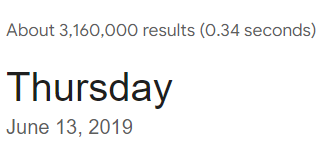

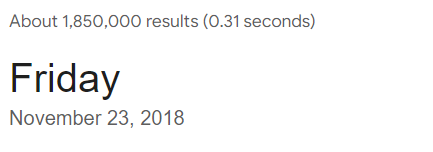

In [29]:
int_week = dict(zip(list(range(7)),"월화수목금토일"))
week_counts = dict(zip("월화수목금토일", [0]*7))

for info in r.json()['list']:
    open_week = datetime.strptime(info['open_dt'],"%Y%m%d").weekday()
    week_counts[int_week[open_week]] +=1

display(week_counts)

print(f'가장 많이 개점한 요일은 {max(week_counts, key=lambda x : week_counts[x])}요일 입니다')

{'월': 47, '화': 125, '수': 120, '목': 167, '금': 143, '토': 6, '일': 2}

가장 많이 개점한 요일은 목요일 입니다


### 스타벅스 개점한 지역 분석

1. 스타벅스 각 지점에 대한 정보 받아오기
2. 개점한 지역정보가 있는 지 탐색
>    - 있을 경우 3번으로 진행
>    - 없을 경우 1번부터 진행
3. 데이터 전처리 
4. 데이터를 순차적으로 탐색하며 집계 함수 작성


In [39]:
display(r.json()['list'][0].keys())
display(r.json()['list'][0]['addr'])

dict_keys(['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order', 'view_yn', 'store_num', 'sido', 'gugun', 'address', 'new_img_nm', 'p_pro_seq', 'p_view_yn', 'p_sido_cd', 'p_gugun_cd', 'p_store_nm', 'p_theme_cd', 'p_wireless_yn', 'p_smoking_yn', 'p_book_yn', 'p_music_yn', 'p_terrace_yn', 'p_table_yn', 'p_takeout_yn', 'p_parking_yn', 'p_dollar_assent', 'p_card_recharge', 'p_subway_yn', 'stb_store_file_renew', 'stb_store_theme_renew', 'stb_store_time_renew', 'stb_store_lsm', 's_code', 's_name', 'tel', 'fax', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name', 'addr', 'park_info', 'new_state', 'theme_state', 'new_bool', 'search_text', 'ins_lat', 'ins_lng', 'in_distance', 'out_distance', 'all_search_cnt', 'addr_search_cnt', 'store_search_cnt', 'rowCount', 'store_nm', 'store_cd', 's_biz_code', 'new_icon', 'set_user', 'favorites', 'map_desc', 'notice', 'defaultimage', 'etcimage', 'in_biz_cd', 'in_store_cd', 'in_favorites', 'in_user_id', 'in_biz_cds', 'in_biz_arr', 'in_biz_arrda

'서울특별시 강남구 역삼동 721-13 아레나빌딩'

In [40]:
unique = set()
for info in r.json()['list']:
    unique.add(info['addr'].split(' ')[1])
display(unique)

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [44]:
gu_counts = dict(zip(unique,[0]*len(unique)))

for info in r.json()['list']:
    gu_counts[info['addr'].split(' ')[1]] +=1

display(gu_counts)

{'강남구': 91,
 '용산구': 24,
 '중구': 53,
 '성동구': 14,
 '도봉구': 7,
 '금천구': 13,
 '영등포구': 41,
 '서초구': 47,
 '노원구': 14,
 '종로구': 39,
 '서대문구': 22,
 '강동구': 17,
 '중랑구': 8,
 '양천구': 17,
 '동작구': 11,
 '관악구': 12,
 '동대문구': 13,
 '강서구': 27,
 '마포구': 36,
 '송파구': 36,
 '광진구': 19,
 '구로구': 14,
 '은평구': 14,
 '강북구': 6,
 '성북구': 15}